In [1]:
import draw2Svg as dw

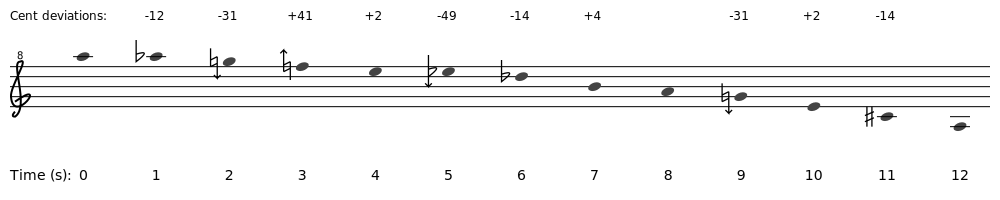

In [172]:
w,h = 1000,200
d = dw.Drawing(w,h)

exec(open('draw2Svg_funs.py').read())
exec(open('draw2Svg_musicnotation.py').read())

# grids and y range
margleft = 10
margright = 10
x_grid = grid(14,w,margleft,margright+30)
y_grid = grid(4,h,0,0)

# sec
size = 14
y = y_grid[3]-20
for i in range(13):
    d.append(dw.Text('%d'%i,size,x_grid[i+1],y,text_anchor='middle'))
d.append(dw.Text('Time (s):',size,x_grid[0],y))

# stave
ystave = y_grid[1]
stave(x_grid[0],ystave,w-margleft-margright)
violinClef(x_grid[0],ystave)
d.append(dw.Text('8',10,x_grid[0]+7,ystave-7.5,font_style='italic'))

# cent
cents = ['','-12','-31','+41','+2','-49','-14','+4','','-31','+2','-14','']
y = y_grid[0]+20
for i in range(13):
    d.append(dw.Text(cents[i],size-2,x_grid[i+1]-2,y,text_anchor='middle'))
d.append(dw.Text('Cent deviations:',size-2,x_grid[0],y))

# notes and ledgers
notepos = [2,2,1,0,-1,-1,-2,-4,-5,-6,-8,-10,-12]
ledgers = [1,1,0,0,0,0,0,0,0,0,0,1,2]
y_notes = []
for i,n in enumerate(notepos):
    x = x_grid[i+1]
    y = ystave-notepos[i]*5
    y_notes.append(y)
    note(x,y,fill='#444')
    l = ledgers[i]
    if l == 1: ledger(x,y)
    if l == 2: ledger(x,y-10,2)

# accidentals
bflat(x_grid[2],y_notes[1],x_offset_mult=1.5,sw=1.3)
bflat(x_grid[6],y_notes[5],x_offset_mult=1.5,sw=1.3,arrow=-1)
bflat(x_grid[7],y_notes[6],x_offset_mult=1.5,sw=1.3)
natural(x_grid[3],y_notes[2],sw=1.3,arrow=-1,x_offset_mult=1.2)
natural(x_grid[4],y_notes[3],sw=1.3,arrow=1,x_offset_mult=1.2)
natural(x_grid[10],y_notes[9],sw=1.3,arrow=-1,x_offset_mult=1.2)
sharp(x_grid[12],y_notes[11],sw=1.3,x_offset_mult=1)

d.savePng('../../images/01-GS-05-d.png')
#d.setPixelScale(5)
d